# Data Analysis

In [44]:
# Importation of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations

In [45]:
# Path to where you want the outputs to be saved
out_directory = "../../out/data_analysis/"

In [46]:
# Importing database
df = pd.read_csv("../../database/data.csv", sep=";")
df.head()

/tmp/ipykernel_12890/2657653744.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../../database/data.csv", sep=";")


,code_op,nom_op,num_site,id_site_partage,id_station_anfr,x,y,latitude,longitude,nom_reg,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
0,20801,Orange,00009334D1,ZPB63246,0632290204,"739926,8","6542833,9","45,98406","3,51575",Auvergne-Rhône-Alpes,...,1,0,0,1,NaN,0,0,0,0,0
1,20801,Orange,00035225E1,ZPB58238,0582290074,"720558,3","6697009,6","47,3731","3,27243",Bourgogne-Franche-Comté,...,1,0,0,0,NaN,0,0,0,0,0
2,20801,Orange,00000001A1,NaN,0802290015,687035,6985761,"49,97028","2,81944",Hauts-de-France,...,0,0,0,1,NaN,0,0,0,0,0
3,20801,Orange,00000001B1,NaN,0642290151,422853,6249263,"43,28861","-0,41389",Nouvelle-Aquitaine,...,0,0,0,1,NaN,0,0,0,0,0
4,20801,Orange,00000001B2,NaN,0332290026,416932,6422196,"44,84112","-0,58333",Nouvelle-Aquitaine,...,0,0,0,1,2021-02-22T00:00:00Z,0,0,0,0,1


In [47]:
display(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117021 entries, 0 to 117020
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   code_op                       117021 non-null  int64 
 1   nom_op                        117021 non-null  object
 2   num_site                      117018 non-null  object
 3   id_site_partage               24413 non-null   object
 4   id_station_anfr               116429 non-null  object
 5   x                             117021 non-null  object
 6   y                             117021 non-null  object
 7   latitude                      117021 non-null  object
 8   longitude                     117021 non-null  object
 9   nom_reg                       117021 non-null  object
 10  nom_dep                       117021 non-null  object
 11  insee_dep                     117021 non-null  object
 12  nom_com                       117021 non-null  object
 13 

None

In [48]:
# df[df['num_site'].isna()]
# len(df.loc[df['mes_4g_trim']==1])
# len(df.loc[df['site_ZB']==1])
# len(df.loc[df['site_DCC']==1])
# len(df.loc[df['site_strategique']==1])
# len(df.loc[df['site_capa_240mbps']==1])
len(df[df['id_site_partage'].notna()]['id_site_partage'].unique())

6252

Vérifier qu'une station de base n'est pas référencée 2 fois

In [7]:
# Supposons que df soit votre DataFrame et 'colonne' le nom de votre colonne
dupliques = df['num_site'].duplicated()

print(np.sum(dupliques))

# Afficher les valeurs dupliquées
valeurs_dupliquees = df['num_site'][dupliques]
print(valeurs_dupliquees)

26
84435         T02BFB
84516         T00AE7
84537         T03CDE
84703         T06476
84880         T005CF
85014         T01DB5
85041         T04EA6
85065         T06F78
85096         T0068D
85113         T04109
85114         T09EA0
85137         T048A7
85144         T07495
85178         T0A089
85185         T09E0D
85242         T01877
85254         T0C8F6
85275         T02A72
85285         T05651
86866         T0E0F8
116732     73034_003
116824    00034899X1
116825     70006_003
116851           NaN
116878           NaN
117020        T10E8E
Name: num_site, dtype: object


## Important facts about database

In [14]:
sites = list(df["num_site"])
nb_sit = len(sites)

regions = list(np.unique(df["nom_reg"]))
nb_reg = len(regions)

departments = list(np.unique(df["nom_dep"]))
nb_dep = len(departments)

cities = list(np.unique(df["nom_com"]))
nb_cit = len(cities)

providers = list(np.unique(df["nom_op"]))
nb_pro = len(providers)

print(nb_sit) # number of sites

print(nb_sit/nb_reg) # mean number of sites per region

print(nb_sit/nb_dep) # mean number of sites per department

print(nb_sit/nb_cit) # mean number of sites per city

# for reg in regions: # number of sites per region
#     print(reg + " : " + str(list(df["nom_reg"]).count(reg)))

# for dep in departments: # number of sites per department
#     print(dep + " : " + str(list(df["nom_dep"]).count(dep)))

# for pro in providers: # number of sites per provider
#     print(pro + " : " + str(list(df["nom_op"]).count(pro)))

# for cit in cities: # number of sites per cities (for cities with a number >= 20)
    # count = list(df["nom_com"]).count(cit)
#     if (count >= 20):
#         nb_cit += 1
#         print(cit + " : " + str(count))

df_proPerReg = pd.DataFrame({
    "nom_reg" : regions,
    "Free Mobile" : [int for i in range(nb_reg)],
    "SFR" : [int for i in range(nb_reg)],
    "Orange" : [int for i in range(nb_reg)],
    "Bouygues Telecom" : [int for i in range(nb_reg)],
    "Total" : [int for i in range(nb_reg)]
})

for reg in regions: # number of sites per region per provider
    for pro in providers:
        count = list(df.loc[df["nom_reg"]==reg, "nom_op"]).count(pro)
        df_proPerReg.loc[df_proPerReg["nom_reg"]==reg, pro] = count
        # print(reg + ", " + pro + " : " + str(count))
    df_proPerReg.loc[df_proPerReg["nom_reg"]==reg, "Total"] = list(df["nom_reg"]).count(reg)

df_proPerDep = pd.DataFrame({
    "nom_dep" : departments,
    "Free Mobile" : [int for i in range(nb_dep)],
    "SFR" : [int for i in range(nb_dep)],
    "Orange" : [int for i in range(nb_dep)],
    "Bouygues Telecom" : [int for i in range(nb_dep)],
    "Total" : [int for i in range(nb_dep)]
})

for dep in departments: # number of sites per department per provider
    for pro in providers:
        count = list(df.loc[df["nom_dep"]==dep, "nom_op"]).count(pro)
        df_proPerDep.loc[df_proPerDep["nom_dep"]==dep, pro] = count
    df_proPerDep.loc[df_proPerDep["nom_dep"]==dep, "Total"] = list(df["nom_dep"]).count(dep)

117021
9001.615384615385
1218.96875
5.906571774682011


In [15]:
df_proPerDep.head()

,nom_dep,Free Mobile,SFR,Orange,Bouygues Telecom,Total
0,Ain,323,329,388,334,1374
1,Aisne,347,273,344,263,1227
2,Allier,247,235,251,233,966
3,Alpes-Maritimes,381,578,535,508,2002
4,Alpes-de-Haute-Provence,171,181,179,178,709


In [16]:
nb_sit_2g = sum(df["site_2g"])
print(nb_sit_2g)

nb_sit_3g = sum(df["site_3g"])
print(nb_sit_3g)

nb_sit_4g = sum(df["site_4g"])
print(nb_sit_4g)

nb_sit_5g = sum(df["site_5g"])
print(nb_sit_5g)

60824
115314
116867
60363


In [17]:
total_bold = "__Total__"

In [18]:
df_proAndTechno = pd.DataFrame({
    "Opérateur" : [pro for pro in providers]
})

In [19]:
df_proAndTechno = pd.concat([df_proAndTechno,pd.DataFrame({'Opérateur' : total_bold},index=[4])])

In [20]:
df_proAndTechno

,Opérateur
0,Bouygues Telecom
1,Free Mobile
2,Orange
3,SFR
4,__Total__


In [21]:
for i in range(2, 6): # techno 2, 3, 4, 5G
    tmp = list(range(2, 6))
    tmp.remove(i)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{i}G"] = sum(df.loc[(df[f"site_{tmp[0]}g"]==0) & (df[f"site_{tmp[1]}g"]==0) & (df[f"site_{tmp[2]}g"]==0) & (df['nom_op']==pro), f"site_{i}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{i}G"] = sum(df_proAndTechno[f"{i}G"][:-1])

In [22]:
def create_tmp(cmb: combinations):
    tmp = list(range(2, 6))
    for rm_tmp in cmb:
        tmp.remove(rm_tmp)
    
    return tmp

In [23]:
# for nb_comb in range(2, 5):
for cmb in combinations(range(2, 6), 2):
    tmp = create_tmp(cmb)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{cmb[0]}-{cmb[1]}G"] = sum(df.loc[(df[f"site_{tmp[0]}g"]==0) & (df[f"site_{tmp[1]}g"]==0) & (df[f"site_{cmb[0]}g"]==1) & (df[f"site_{cmb[1]}g"]==1) & (df['nom_op']==pro), f"site_{cmb[0]}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{cmb[0]}-{cmb[1]}G"] = sum(df_proAndTechno[f"{cmb[0]}-{cmb[1]}G"][:-1])

for cmb in combinations(range(2, 6), 3):
    tmp = create_tmp(cmb)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{cmb[0]}-{cmb[1]}-{cmb[2]}G"] = sum(df.loc[(df[f"site_{tmp[0]}g"]==0) & (df[f"site_{cmb[0]}g"]==1) & (df[f"site_{cmb[1]}g"]==1) & (df[f"site_{cmb[2]}g"]==1) & (df['nom_op']==pro), f"site_{cmb[0]}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{cmb[0]}-{cmb[1]}-{cmb[2]}G"] = sum(df_proAndTechno[f"{cmb[0]}-{cmb[1]}-{cmb[2]}G"][:-1])

for cmb in combinations(range(2, 6), 4):
    tmp = create_tmp(cmb)
    for pro in providers:
        df_proAndTechno.loc[df_proAndTechno['Opérateur']==pro, f"{cmb[0]}-{cmb[1]}-{cmb[2]}-{cmb[3]}G"] = sum(df.loc[(df[f"site_{cmb[0]}g"]==1) & (df[f"site_{cmb[1]}g"]==1) & (df[f"site_{cmb[2]}g"]==1) & (df[f"site_{cmb[3]}g"]==1) & (df['nom_op']==pro), f"site_{cmb[0]}g"])
    df_proAndTechno.loc[df_proAndTechno['Opérateur']==total_bold, f"{cmb[0]}-{cmb[1]}-{cmb[2]}-{cmb[3]}G"] = sum(df_proAndTechno[f"{cmb[0]}-{cmb[1]}-{cmb[2]}-{cmb[3]}G"][:-1])

In [24]:
for i in df_proAndTechno.columns[1:]:
    df_proAndTechno[i] = df_proAndTechno[i].astype(int)

In [25]:
df_proAndTechno["Total"] = df_proAndTechno[df_proAndTechno.columns[1:]].sum(axis=1)

In [26]:
df_proAndTechno

,Opérateur,2G,3G,4G,5G,2-3G,2-4G,2-5G,3-4G,3-5G,4-5G,2-3-4G,2-3-5G,2-4-5G,3-4-5G,2-3-4-5G,Total
0,Bouygues Telecom,2,17,81,0,26,0,0,5201,0,0,9501,0,0,3182,10816,28826
1,Free Mobile,0,30,81,0,0,0,0,7438,0,1,0,0,0,20593,0,28143
2,Orange,7,24,830,2,14,43,0,9419,0,281,9455,1,9,2442,9070,31597
3,SFR,7,7,276,0,17,25,0,4163,0,48,9994,0,14,2081,11823,28455
4,__Total__,16,78,1268,2,57,68,0,26221,0,330,28950,1,23,28298,31709,117021


In [27]:
df_techno = pd.DataFrame({
    "Opérateur" : [pro for pro in providers]
})
df_techno = pd.concat([df_techno,pd.DataFrame({'Opérateur' : total_bold},index=[4])])
for i in range(2, 6):
    for pro in providers:
        df_techno.loc[df_techno['Opérateur']==pro, f"avec_{i}G"] = sum(df.loc[df['nom_op']==pro, f"site_{i}g"])
    df_techno.loc[df_techno['Opérateur']==total_bold, f"avec_{i}G"] = sum(df_techno[f"avec_{i}G"][:-1])
df_techno["Total"] = df_techno[df_techno.columns[1:]].sum(axis=1)
for i in df_techno.columns[1:]:
    df_techno[i] = df_techno[i].astype(int)
df_techno

,Opérateur,avec_2G,avec_3G,avec_4G,avec_5G,Total
0,Bouygues Telecom,20345,28743,28781,13998,91867
1,Free Mobile,0,28061,28113,20594,76768
2,Orange,18599,30425,31549,11805,92378
3,SFR,21880,28085,28424,13966,92355
4,__Total__,60824,115314,116867,60363,353368


## Barplots

### Color palettes

In [28]:
color_pal_pro = {'Orange':'#fc5603','SFR':'#169e26','Bouygues Telecom':'#035afc', 'Free Mobile':'#dbd640'}
# color_pal_tec = {"2G":' #4285F4',"3G":'#34A853',"4G":'#FBBC05', "5G":' #EA4335'}

### DataFrame creation for easier plots

In [29]:
def easyPlotting_df(df):
    array_index = [list(df['Opérateur'][:-1]), list(df.columns[1:])]
    index=pd.MultiIndex.from_product(array_index, names=["nom_op", "techno"])

    df_easy = pd.DataFrame(index=index)
    for pro in providers:
        for techno in list(df.columns[1:]):
            df_easy.loc[(pro,techno), 'number'] = df.loc[df['Opérateur']==pro, techno].iloc[0]
    df_easy['number'] = df_easy['number'].astype(int)

    return df_easy

### Definition of a helpful fonction for plotting the dataFrames above

In [30]:
def pretty_barPlot(df, **kwargs):
    plot_title = kwargs.get('save_as', None)
    
    sns.set_context('paper') # size of ticks labels
    sns.set_theme(style="whitegrid") # style of the backgroung
    g = sns.catplot(
        data=easyPlotting_df(df),
        kind='bar',
        x='nom_op',
        y='number',
        col='techno',
        hue='nom_op',
        palette=color_pal_pro
    )
    g.tick_params(axis='x', rotation=15)
    
    if(plot_title):
        plt.savefig(out_directory + plot_title + ".png", dpi=100)

### Number of sites with at least the $x$ G technology ($x\in\{2,\dots,5\}$)

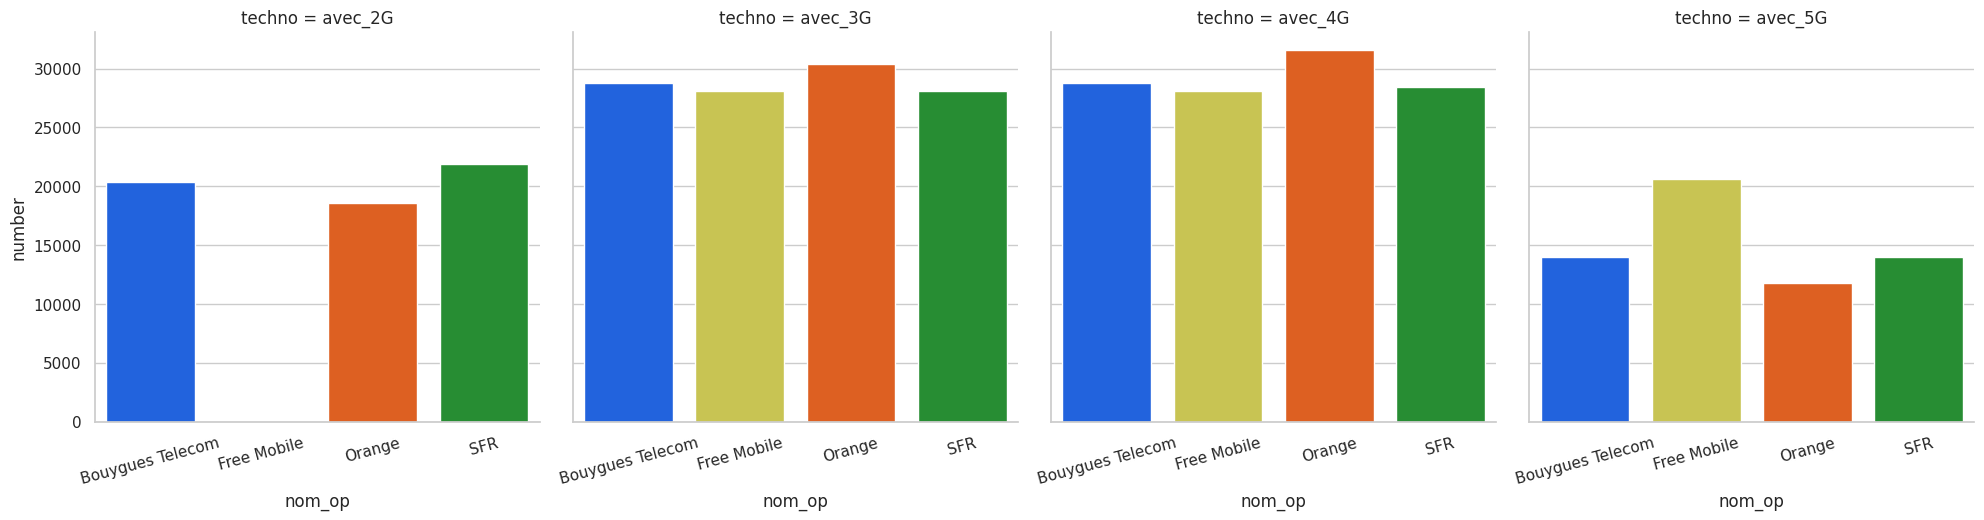

In [31]:
pretty_barPlot(df_techno.loc[:, :'avec_5G'], save_as='avec_techno')

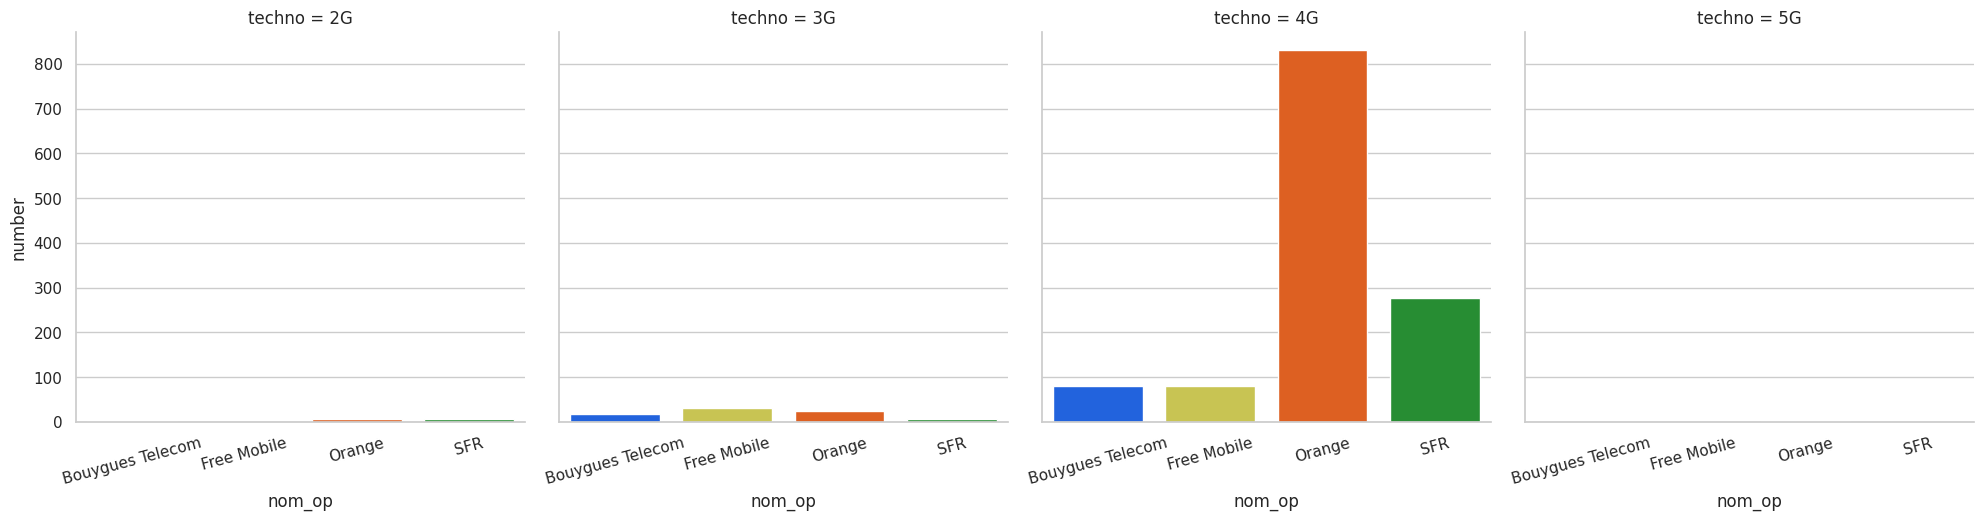

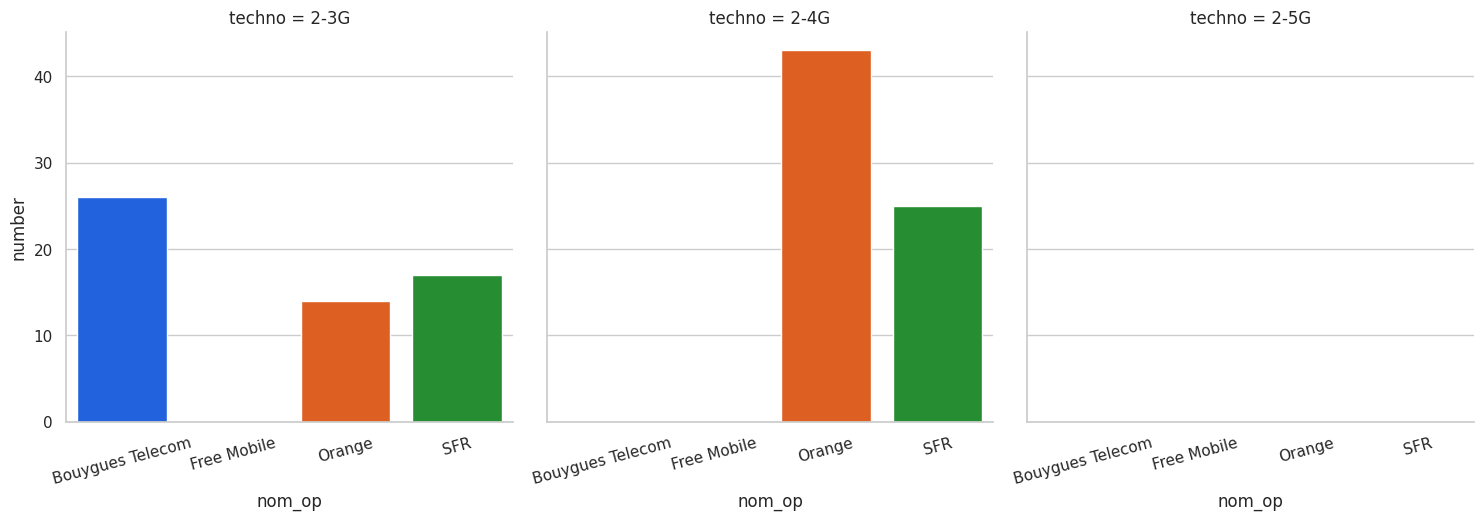

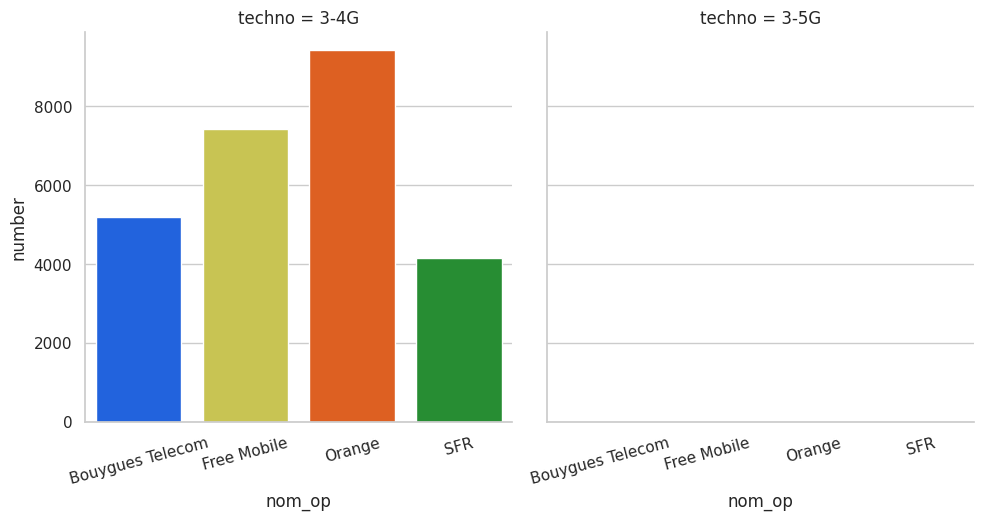

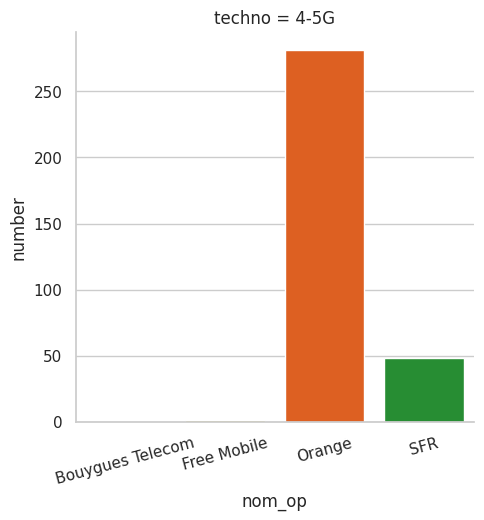

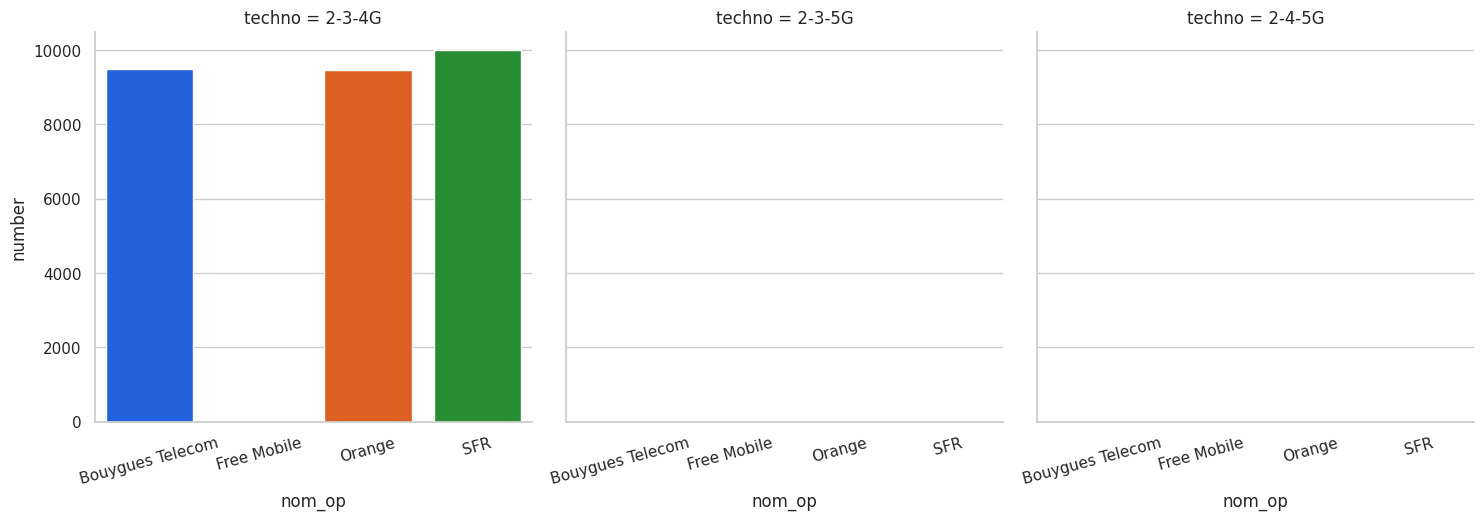

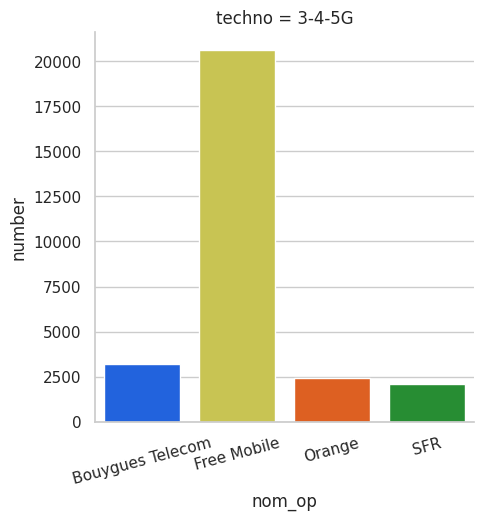

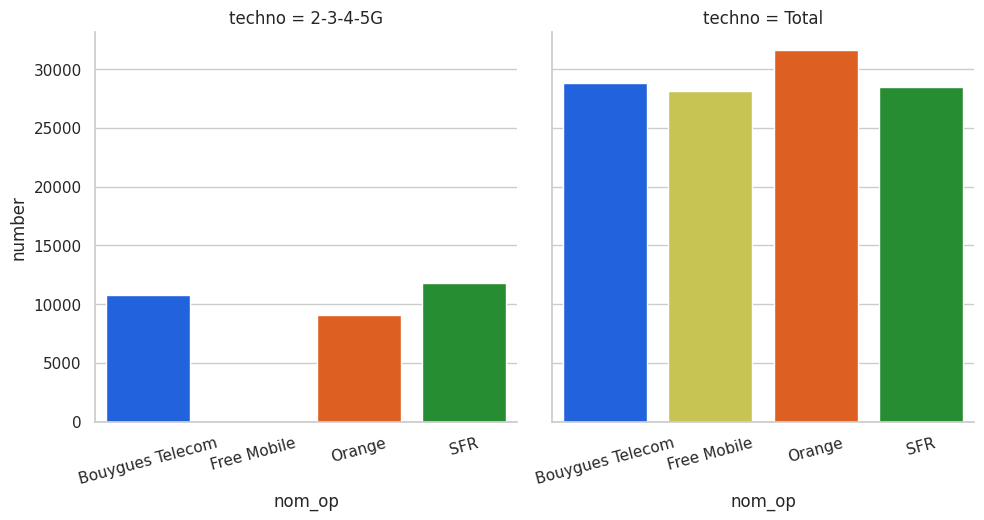

In [32]:
pretty_barPlot(df_proAndTechno.iloc[:, [0,1,2,3,4]], save_as='xG')
pretty_barPlot(df_proAndTechno.iloc[:, [0,5,6,7]], save_as='2-xG')
pretty_barPlot(df_proAndTechno.iloc[:, [0,8,9]], save_as='3-xG')
pretty_barPlot(df_proAndTechno.iloc[:, [0,10]], save_as='4-5G')
pretty_barPlot(df_proAndTechno.iloc[:, [0,11,12,13]], save_as='2-x-yG')
pretty_barPlot(df_proAndTechno.iloc[:, [0,14]], save_as='3-4-5G')
pretty_barPlot(df_proAndTechno.iloc[:, [0,15,16]], save_as='all-tot')

## 5G frequencies

In [33]:
df_5G_freq = pd.DataFrame({
    "Opérateur" : [pro for pro in providers]
})
df_5G_freq = pd.concat([df_5G_freq,pd.DataFrame({'Opérateur' : total_bold},index=[4])])

for freq in [700, 800, 1800, 2100, 3500]:
    for pro in providers:
        df_5G_freq.loc[df_5G_freq['Opérateur']==pro, f"site_5g_{freq}_m_hz"] = sum(df.loc[df['nom_op']==pro, f"site_5g_{freq}_m_hz"])
    df_5G_freq.loc[df_5G_freq['Opérateur']==total_bold, f"site_5g_{freq}_m_hz"] = sum(df_5G_freq[f"site_5g_{freq}_m_hz"][:-1])

for i in df_5G_freq.columns[1:]:
    df_5G_freq[i] = df_5G_freq[i].astype(int)

df_5G_freq

,Opérateur,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
0,Bouygues Telecom,0,0,0,13063,8700
1,Free Mobile,20514,0,0,0,8061
2,Orange,657,0,0,496,11388
3,SFR,0,0,0,9680,9401
4,__Total__,21171,0,0,23239,37550


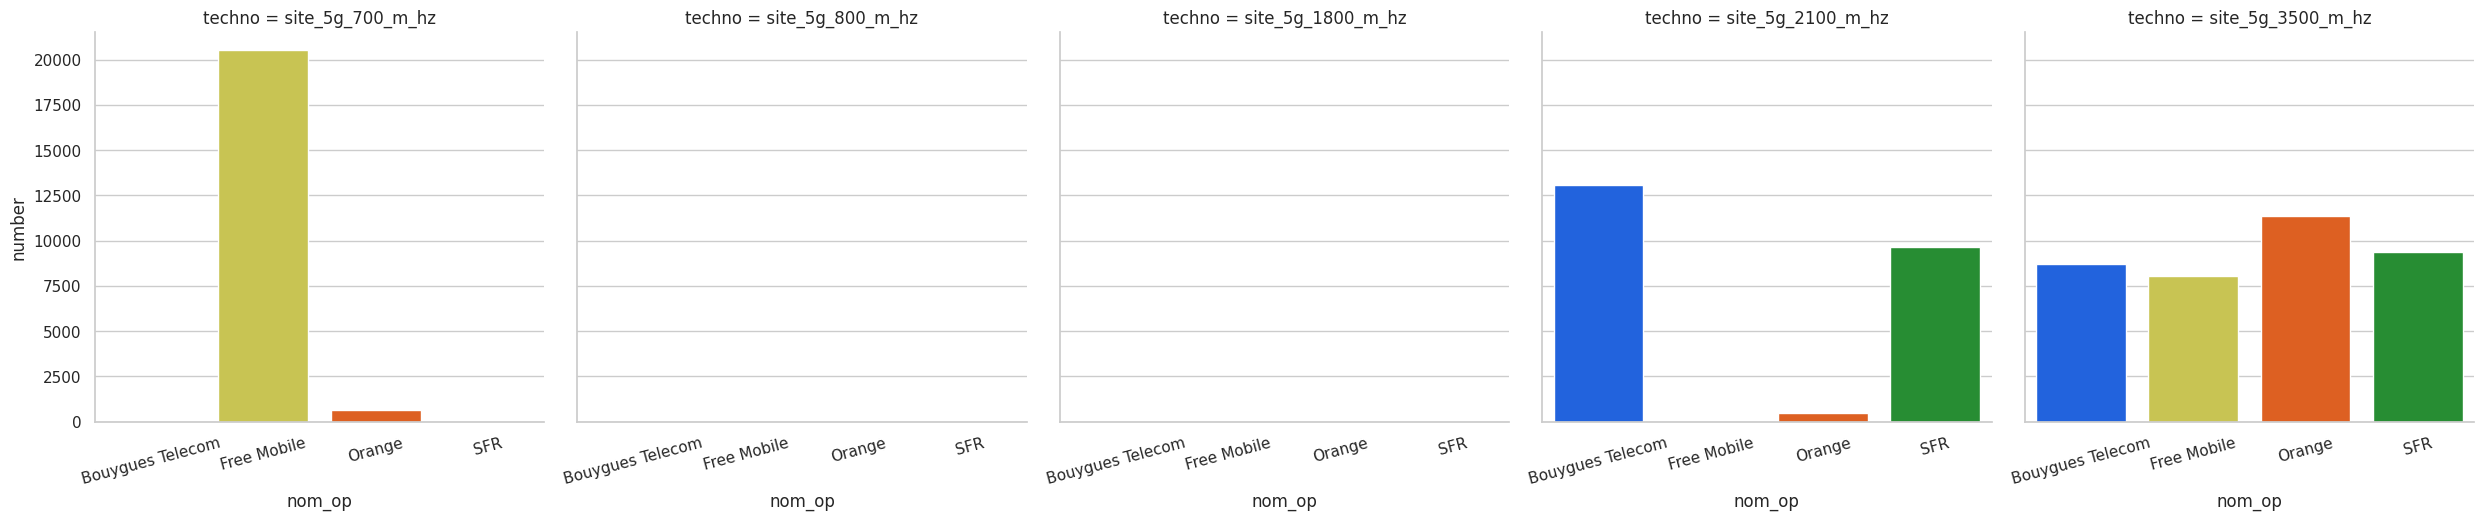

In [34]:
pretty_barPlot(df_5G_freq, save_as='5G_freq')

## Some numbers linked to the population

### Recovery of area and population data from Internet data

In [49]:
## Data import
from bs4 import BeautifulSoup
import requests

url = "https://france.ousuisje.com/departements/classement/superficie.php"

reponse = requests.get(url)
html_doc = reponse.text
soup = BeautifulSoup(html_doc, 'html.parser')
table_informations = soup.find('table', summary="Classement des départements français par superficie")
# On recherche le header
header = table_informations.find('thead')

# On trouve toutes les lignes du tableau
rows = table_informations.find('tbody').find_all('tr')

# Extraction des colonnes
column_names = [th.text.strip() for th in header.find_all('th')]

In [50]:
## Dataframe Creation

# Création d'une liste vide qui contiendra les données de chaque départements
data = []

# Extraction de chaques données
for row in rows:
    row_data = [td.text.strip() for td in row.find_all('td')]
    data.append(row_data)

# Création du Dataframe
df_dep = pd.DataFrame(data, columns=column_names)

df_dep.head()

,Département / No / Région,Superficie [en km²],Population,Densite [hab. /km²]
0,Guyane\n\n (973)\n [Guyane],86 504,230 000,4
1,Gironde\n\n (33)\n [Aquitaine],10 000,1 376 000,138
2,Landes\n\n (40)\n [Aquitaine],9 243,327 334,35
3,Dordogne\n\n (24)\n [Aquitaine],9 060,401 500,43
4,Côte-d'Or\n\n (21)\n [Bourgogne],8 763,506 755,58


### DataFrame improvment

In [51]:
df_dep[['nom_dep', 'insee_dep', 'nom_reg']] = df_dep['Département / No / Région'].str.split('\n\n|\n \[|\]\n', expand=True)
# Suppression des parenthèses dans la colonne 'code_dep'
df_dep['insee_dep'] = df_dep['insee_dep'].str.replace('(', '').str.replace(')', '', regex = False).astype(str)

# Suppression du crochet dans la colonne 'nom_region'
# df_dep['nom_reg'] = df_dep['nom_reg'].str.replace(']', '', regex = False)

# Suppression de la colonne 'nom_region' 
df_dep.drop(['Département / No / Région','nom_reg'], axis=1, inplace=True)

df_dep['insee_dep'] = df_dep['insee_dep'].str.lstrip(' ') #.str.lstrip('0')

# Suppression des outre-mers
df_dep = df_dep.drop(df_dep[(df_dep['insee_dep'] == '973') | (df_dep['insee_dep'] == '972') | (df_dep['insee_dep'] == '974') | (df_dep['insee_dep'] == '976') | (df_dep['insee_dep'] == '971')].index)

# display(df_dep.head())

for code in df_dep['insee_dep']:
    df_dep.loc[df_dep['insee_dep']==code, 'nom_dep'] = df.loc[df['insee_dep']==code, 'nom_dep'].iloc[0]
df_dep.drop('insee_dep', axis=1, inplace=True)

display(df_dep.head())

<>:1: SyntaxWarning: invalid escape sequence '\['
<>:1: SyntaxWarning: invalid escape sequence '\['
/tmp/ipykernel_12890/3977790740.py:1: SyntaxWarning: invalid escape sequence '\['
  df_dep[['nom_dep', 'insee_dep', 'nom_reg']] = df_dep['Département / No / Région'].str.split('\n\n|\n \[|\]\n', expand=True)


,Superficie [en km²],Population,Densite [hab. /km²],nom_dep
1,10 000,1 376 000,138,Gironde
2,9 243,327 334,35,Landes
3,9 060,401 500,43,Dordogne
4,8 763,506 755,58,Côte-d'Or
5,8 735,271 200,31,Aveyron


### Digitization of added columns

In [52]:
df_dep['Superficie [en km²]'] = df_dep['Superficie [en km²]'].str.replace('\xa0', '')
df_dep['Population'] = df_dep['Population'].str.replace('\xa0', '')
df_dep['Densite [hab. /km²]'] = df_dep['Densite [hab. /km²]'].str.replace('\xa0', '')

In [53]:
arrays = [[],[]]
for reg in regions:
    for dep in df_dep['nom_dep']:
        if(pd.unique(df.loc[df['nom_dep']==dep, 'nom_reg'])==reg) and (dep not in arrays[1]):
            arrays[0].append(reg)
            arrays[1].append(dep)
index = pd.MultiIndex.from_arrays(arrays, names=["nom_reg", "nom_dep"])

In [54]:
df_dep_multiIndex = pd.DataFrame(index=index)
for ind in df_dep_multiIndex.index.values: # ind[0] --> nom_reg / ind[1] --> nom_dep
    df_dep_multiIndex.loc[ind, list(df_dep.columns[:-1])] = list(df_dep.loc[df_dep['nom_dep']==ind[1],:'Densite [hab. /km²]'].iloc[0])

df_dep_multiIndex

Superficie [en km²] Population  \
nom_reg              nom_dep                                            
Auvergne-Rhône-Alpes Puy-de-Dôme                      7970     621000   
                     Isère                            7431    1172000   
                     Allier                           7340     342284   
                     Drôme                            6530     457651   
                     Savoie                           6028     392156   
...                                                    ...        ...   
Île-de-France        Val-d'Oise                       1246    1105464   
                     Val-de-Marne                      245    1279000   
                     Seine-Saint-Denis                 236    1485000   
                     Hauts-de-Seine                    176    1517000   
                     Paris                             105    2166200   

                                       Densite [hab. /km²]  
nom_reg              nom_dep                                
Auvergne-Rhône-Alpes Puy-de-Dôme                        76  
                     Isère                             157  
                     Allier                             47  
                     Drôme                              67  
                     Savoie                             62  
...                                                    ...  
Île-de-France        Val-d'Oise                        887  
                     Val-de-Marne                     5220  
                     Seine-Saint-Denis                6292  
                     Hauts-de-Seine                   8619  
                     Paris                           20433  

[96 rows x 3 columns]

In [55]:
for ind in df_dep_multiIndex.index.values:
    df_dep_multiIndex.loc[ind, 'nb_stations'] = df_proPerDep.loc[df_proPerDep['nom_dep']==ind[1], 'Total'].iloc[0]

for col in df_dep_multiIndex.columns:
    df_dep_multiIndex[col] = df_dep_multiIndex[col].astype(int)

display(df_dep_multiIndex.head())

Superficie [en km²]  Population  \
nom_reg              nom_dep                                        
Auvergne-Rhône-Alpes Puy-de-Dôme                 7970      621000   
                     Isère                       7431     1172000   
                     Allier                      7340      342284   
                     Drôme                       6530      457651   
                     Savoie                      6028      392156   

                                  Densite [hab. /km²]  nb_stations  
nom_reg              nom_dep                                        
Auvergne-Rhône-Alpes Puy-de-Dôme                   76         1562  
                     Isère                        157         1978  
                     Allier                        47          966  
                     Drôme                         67         1231  
                     Savoie                        62         1066

### Column addition

In [56]:
df_dep_multiIndex['nb_stations_par_hab'] = df_dep_multiIndex['nb_stations']/df_dep_multiIndex['Population']
df_dep_multiIndex['nb_stations_par_hab_par_km2'] = df_dep_multiIndex['nb_stations']/df_dep_multiIndex['Densite [hab. /km²]']
df_dep_multiIndex['nb_stations_par_km2'] = df_dep_multiIndex['nb_stations']/df_dep_multiIndex['Superficie [en km²]']
df_dep_multiIndex['nb_hab_par_stations_par_km2'] = df_dep_multiIndex['Population']/(df_dep_multiIndex['nb_stations'] * df_dep_multiIndex['Superficie [en km²]'])
df_dep_multiIndex['nb_hab_par_station'] = df_dep_multiIndex['Population']/df_dep_multiIndex['nb_stations']

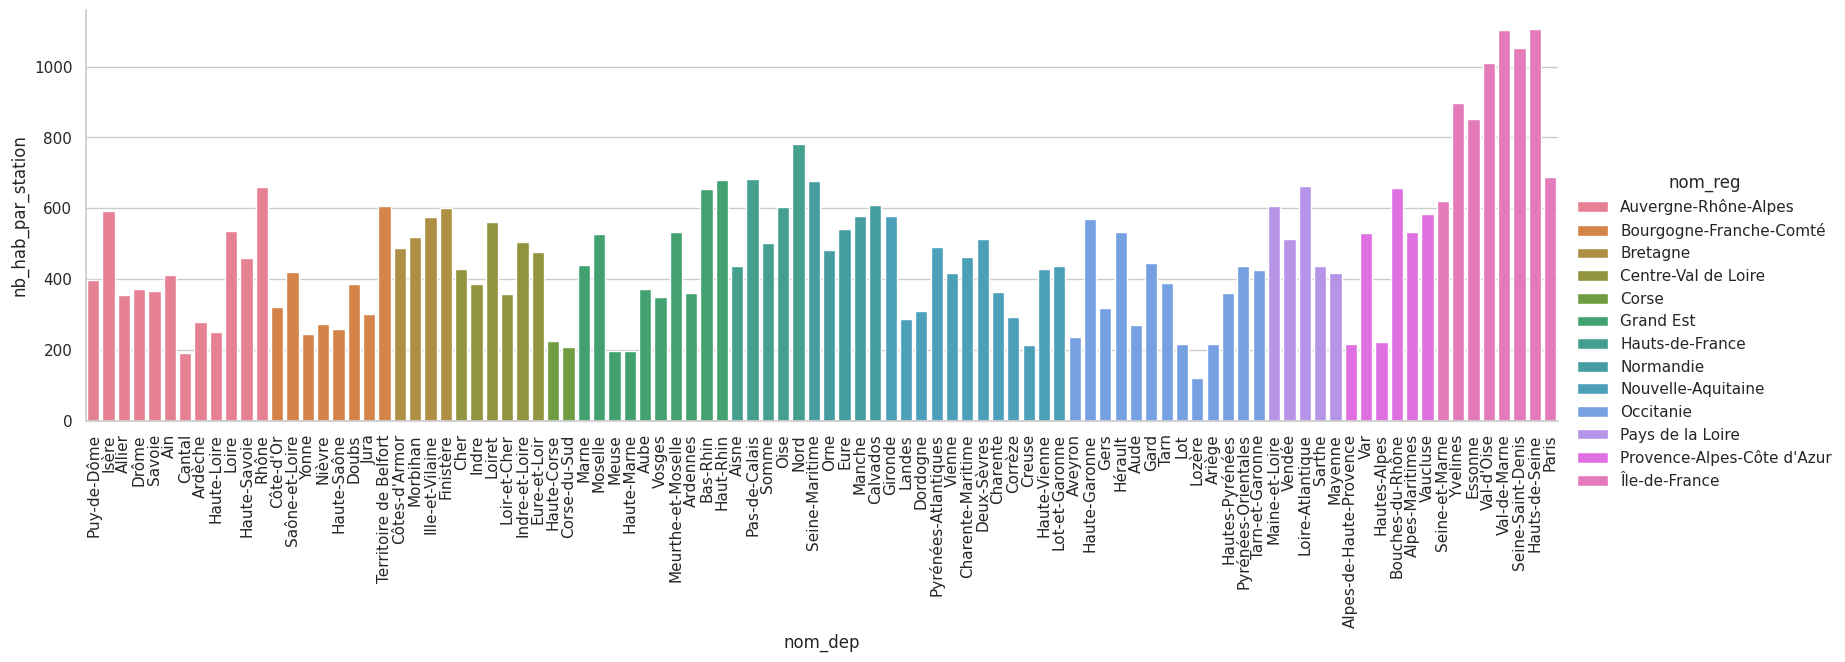

In [57]:
sns.set_context('paper') # size of ticks labels
sns.set_theme(style="whitegrid") # style of the backgroung
g = sns.catplot(
    data=df_dep_multiIndex,
    kind='bar',
    x='nom_dep',
    y='nb_hab_par_station',
    hue='nom_reg',
    aspect=16/5
)
g.tick_params(axis='x', rotation=90)

plt.savefig(out_directory + "nb_hab_par_station_par_dep" + ".png", dpi=100, bbox_inches='tight')

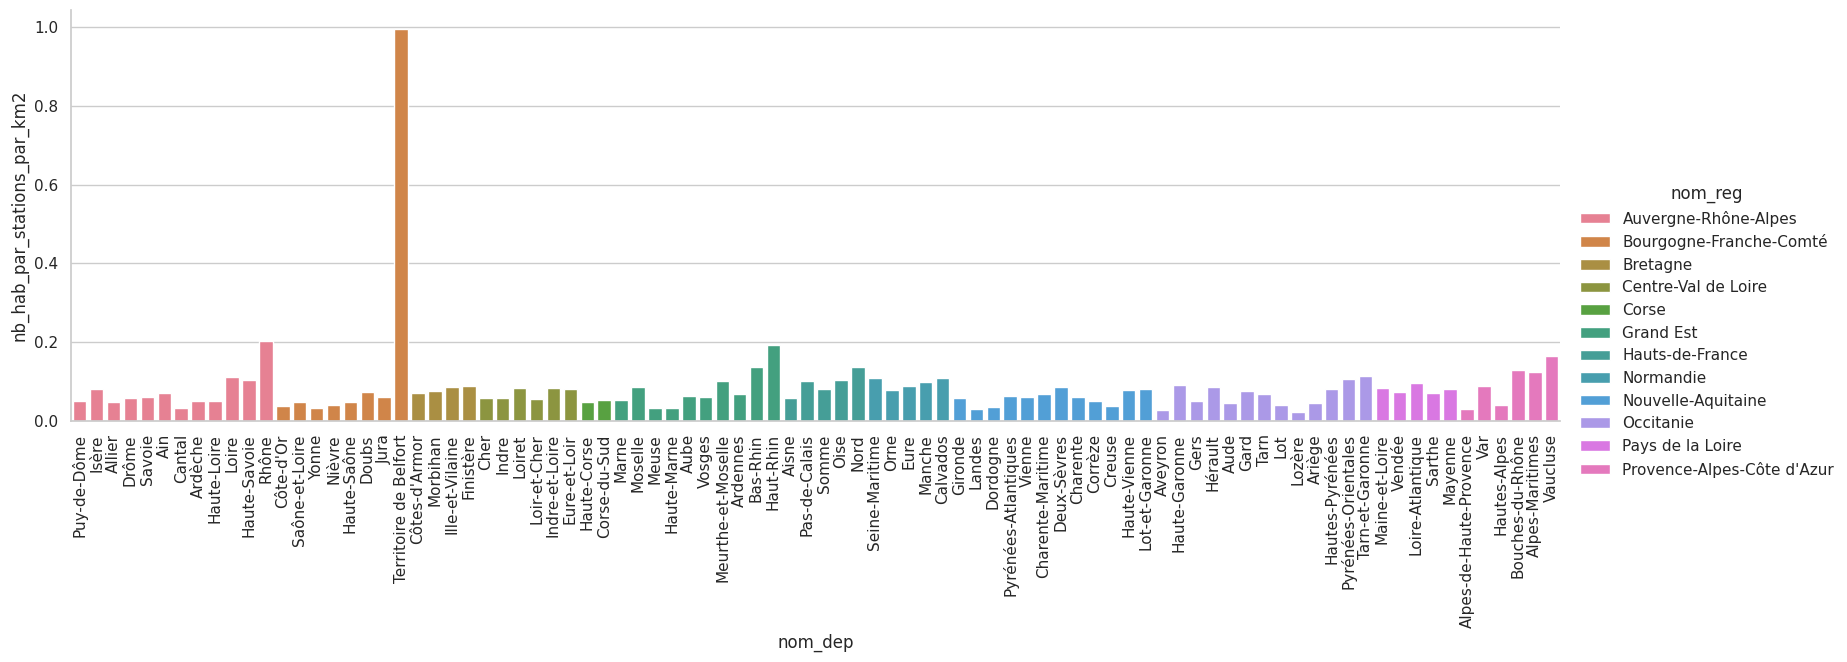

In [58]:
sns.set_context('paper') # size of ticks labels
sns.set_theme(style="whitegrid") # style of the backgroung
g = sns.catplot(
    data=df_dep_multiIndex.drop('Île-de-France'),
    kind='bar',
    x='nom_dep',
    y='nb_hab_par_stations_par_km2',
    hue='nom_reg',
    aspect=16/5
)
g.tick_params(axis='x', rotation=90)

plt.savefig(out_directory + "nb_hab_par_stations_par_km2_sansIDF" + ".png", dpi=100, bbox_inches='tight')

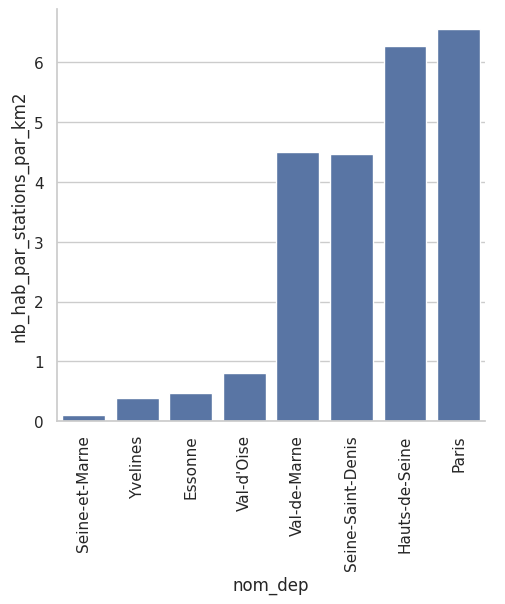

In [59]:
sns.set_context('paper') # size of ticks labels
sns.set_theme(style="whitegrid") # style of the backgroung
g = sns.catplot(
    data=df_dep_multiIndex.loc['Île-de-France'],
    kind='bar',
    x='nom_dep',
    y='nb_hab_par_stations_par_km2',
    # hue='nom_reg',
    # aspect=16/5
)
g.tick_params(axis='x', rotation=90)

plt.savefig(out_directory + "nb_hab_par_stations_par_km2_IDF" + ".png", dpi=100, bbox_inches='tight')

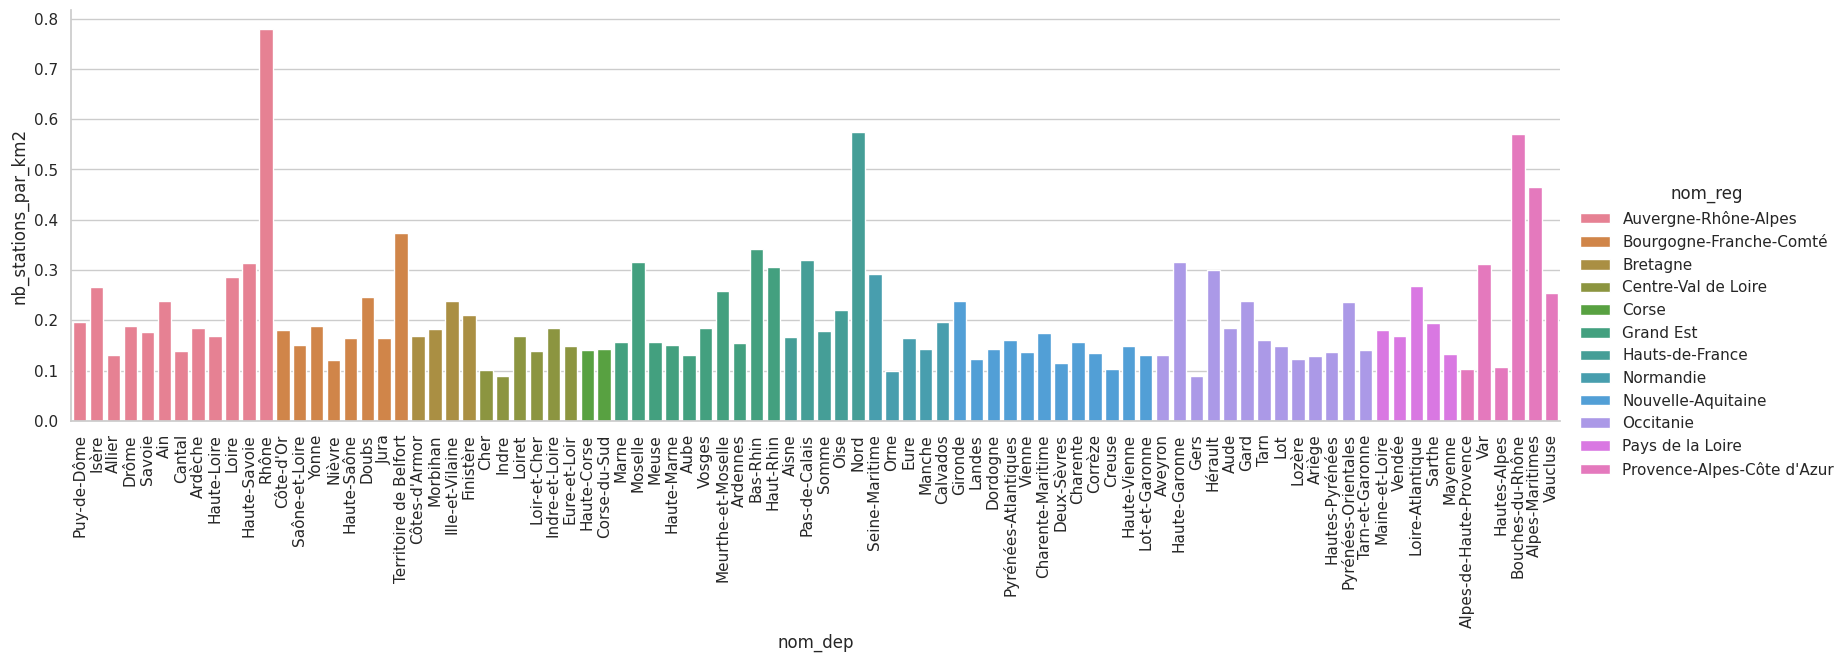

In [61]:
g = sns.catplot(
    data=df_dep_multiIndex.drop('Île-de-France'),
    kind='bar',
    x='nom_dep',
    y='nb_stations_par_km2',
    hue='nom_reg',
    aspect=16/5
)
g.tick_params(axis='x', rotation=90)

plt.savefig(out_directory + "densite_station_par_dep_sansIDF" + ".png", dpi=100, bbox_inches='tight')

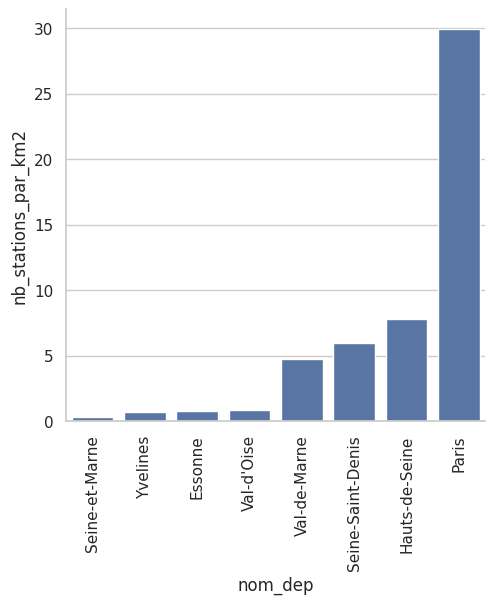

In [62]:
g = sns.catplot(
    data=df_dep_multiIndex.loc['Île-de-France'],
    kind='bar',
    x='nom_dep',
    y='nb_stations_par_km2',
    # hue='nom_reg',
    # aspect=16/5
)
g.tick_params(axis='x', rotation=90)

plt.savefig(out_directory + "densite_station_par_dep_IDF" + ".png", dpi=100, bbox_inches='tight')

## File exportation

In [64]:
results = open(out_directory + "data_numbers.md", "w")

results.write("# Analyse des données\n")

results.write("## Description des champs :\n cf. https://data.arcep.fr/mobile/sites/\n")

results.write("## A quoi ressemble la base ?\n")
results.write(df.head().iloc[:,:10].to_markdown(index=False) + "\n")
results.write("\n" + df.head().iloc[:,10:20].to_markdown(index=False) + "\n")
results.write("\n" + df.head().iloc[:,20:26].to_markdown(index=False) + "\n")
results.write("\n" + df.head().iloc[:,26:].to_markdown(index=False) + "\n")

results.write("## Chiffres sur les stations de base :\n")

results.write("### Chiffres généraux :\n")
results.write("|||\n|---|---:|\n")
results.write("| Stations de base | " + str(nb_sit) + " | \n")
results.write("| Stations de base/région (moyenne) | " + str(round(nb_sit/nb_reg)) + " |\n")
results.write("| Stations de base/département (moyenne) | " + str(round(nb_sit/nb_dep)) + " |\n")
results.write("| Stations de base/ville (moyenne) | " + str(round(nb_sit/nb_cit)) + " |\n")

results.write("### Stations par opérateurs :\n")
results.write("|Opérateur|Nb de stations|\n|---|---:|\n")
for pro in np.unique(providers):
    results.write("| " + pro + " | " + str(list(df["nom_op"]).count(pro)) + " | \n")

results.write("### Stations par régions, par opérateurs :\n")
results.write(df_proPerReg.to_markdown(index=False) + "\n")

results.write("### Stations par départements, par opérateurs :\n")
results.write(df_proPerDep.to_markdown(index=False) + "\n")

results.write("### Type de réseau :\n")
results.write(df_techno.to_markdown(index=False) + "\n")

results.write("### Fréquences utilisées par la 5G :\n")
results.write(df_5G_freq.to_markdown(index=False) + "\n")

results.write("### Stations par technologies, par opérateurs :\n")
results.write(df_proAndTechno.to_markdown(index=False) + "\n")

results.write("### Stations par habitants, vice versa et par km2 :\n")
results.write(df_dep_multiIndex.to_markdown() + "\n")

results.close()

In [65]:
# df_dep.to_csv('data_popArea.csv',sep=';') # To keep the data we collected as .csv